In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [65]:
import os
import tarfile
from six.moves import urllib


In [66]:
df = pd.read_excel("data.xlsx")
df_path = os.path.join("data", "metrics")  #################################

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codigo                      132 non-null    object 
 1   Status                      132 non-null    int64  
 2   Ano_Avaliação               132 non-null    int64  
 3   Ano_Nascimento              132 non-null    int64  
 4   IdadeCronológica            132 non-null    float64
 5   QuartilNascimento           132 non-null    int64  
 6   Ambidestro                  132 non-null    int64  
 7   PosiçãoJogo                 132 non-null    int64  
 8   NívelCompetitivo            132 non-null    int64  
 9   VitóriaEmCompetição         132 non-null    int64  
 10  CompetênciaPercebida        132 non-null    int64  
 11  P_CompetênciaPercebida      132 non-null    int64  
 12  Lidar                       132 non-null    float64
 13  P_Lidar                     132 non

In [68]:
df["TACSIS_PD"].value_counts() #show the existent categories for the categorical attributes

4.780000    5
4.440000    4
4.560000    4
5.000000    4
4.330000    4
4.110000    3
3.890000    3
3.440000    3
4.220000    2
5.777778    2
5.220000    2
4.670000    2
4.888889    2
3.777778    2
5.330000    2
4.000000    2
4.890000    2
5.110000    2
4.111111    2
3.560000    1
2.560000    1
3.670000    1
4.777778    1
3.888889    1
3.220000    1
2.890000    1
4.666667    1
3.780000    1
4.444444    1
4.333333    1
Name: TACSIS_PD, dtype: int64

In [69]:
df.describe() #shows summary of the numerical attributes

,Status,Ano_Avaliação,Ano_Nascimento,IdadeCronológica,QuartilNascimento,Ambidestro,PosiçãoJogo,NívelCompetitivo,VitóriaEmCompetição,CompetênciaPercebida,...,TACSIS_CSO,P_TACISIS CSO,TACSIS_ASM,P_TACSIS ASM,TACSIS,P_TACSIS,EAP_%Atingida,Maturação_EscoreZ,Classif_MaturaçãoBiologica,IdadePVC
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,132.000000,132.000000,132.000000,132.000000
mean,0.159091,2016.015152,2001.257576,14.745650,0.386364,0.151515,3.780303,1.734848,1.068182,7.674242,...,3.853968,46.300383,4.373016,50.225605,4.277588,49.787270,94.723195,0.848260,2.371212,14.219739
std,0.367154,1.003694,1.345738,1.389550,0.488770,0.359916,0.902197,1.002743,0.966565,1.059283,...,0.867482,29.239523,0.855336,28.061239,0.578990,25.836572,5.260130,1.054426,0.530091,0.722167
min,0.000000,2015.000000,1998.000000,11.969884,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,...,1.800000,0.819754,2.000000,0.586774,2.981944,3.437950,83.407923,-2.830150,1.000000,12.631846
25%,0.000000,2015.000000,2000.000000,13.728953,0.000000,0.000000,3.000000,1.000000,0.000000,7.000000,...,3.200000,19.489452,3.750000,25.142890,3.900000,29.289784,91.091416,0.287614,2.000000,13.746518
50%,0.000000,2017.000000,2001.000000,14.581793,0.000000,0.000000,4.000000,2.000000,1.000000,8.000000,...,3.800000,42.074029,4.500000,54.775843,4.300000,50.398936,95.145595,0.786794,2.000000,14.137881
75%,0.000000,2017.000000,2002.000000,15.880219,1.000000,0.000000,4.000000,2.000000,2.000000,8.000000,...,4.600000,75.174777,5.000000,73.891370,4.653611,69.321837,98.759358,1.322966,3.000000,14.737111
max,1.000000,2017.000000,2003.000000,17.623546,1.000000,1.000000,5.000000,4.000000,4.000000,10.000000,...,5.200000,90.987733,6.000000,95.448602,5.619444,96.784323,106.195699,4.608869,3.000000,16.882934


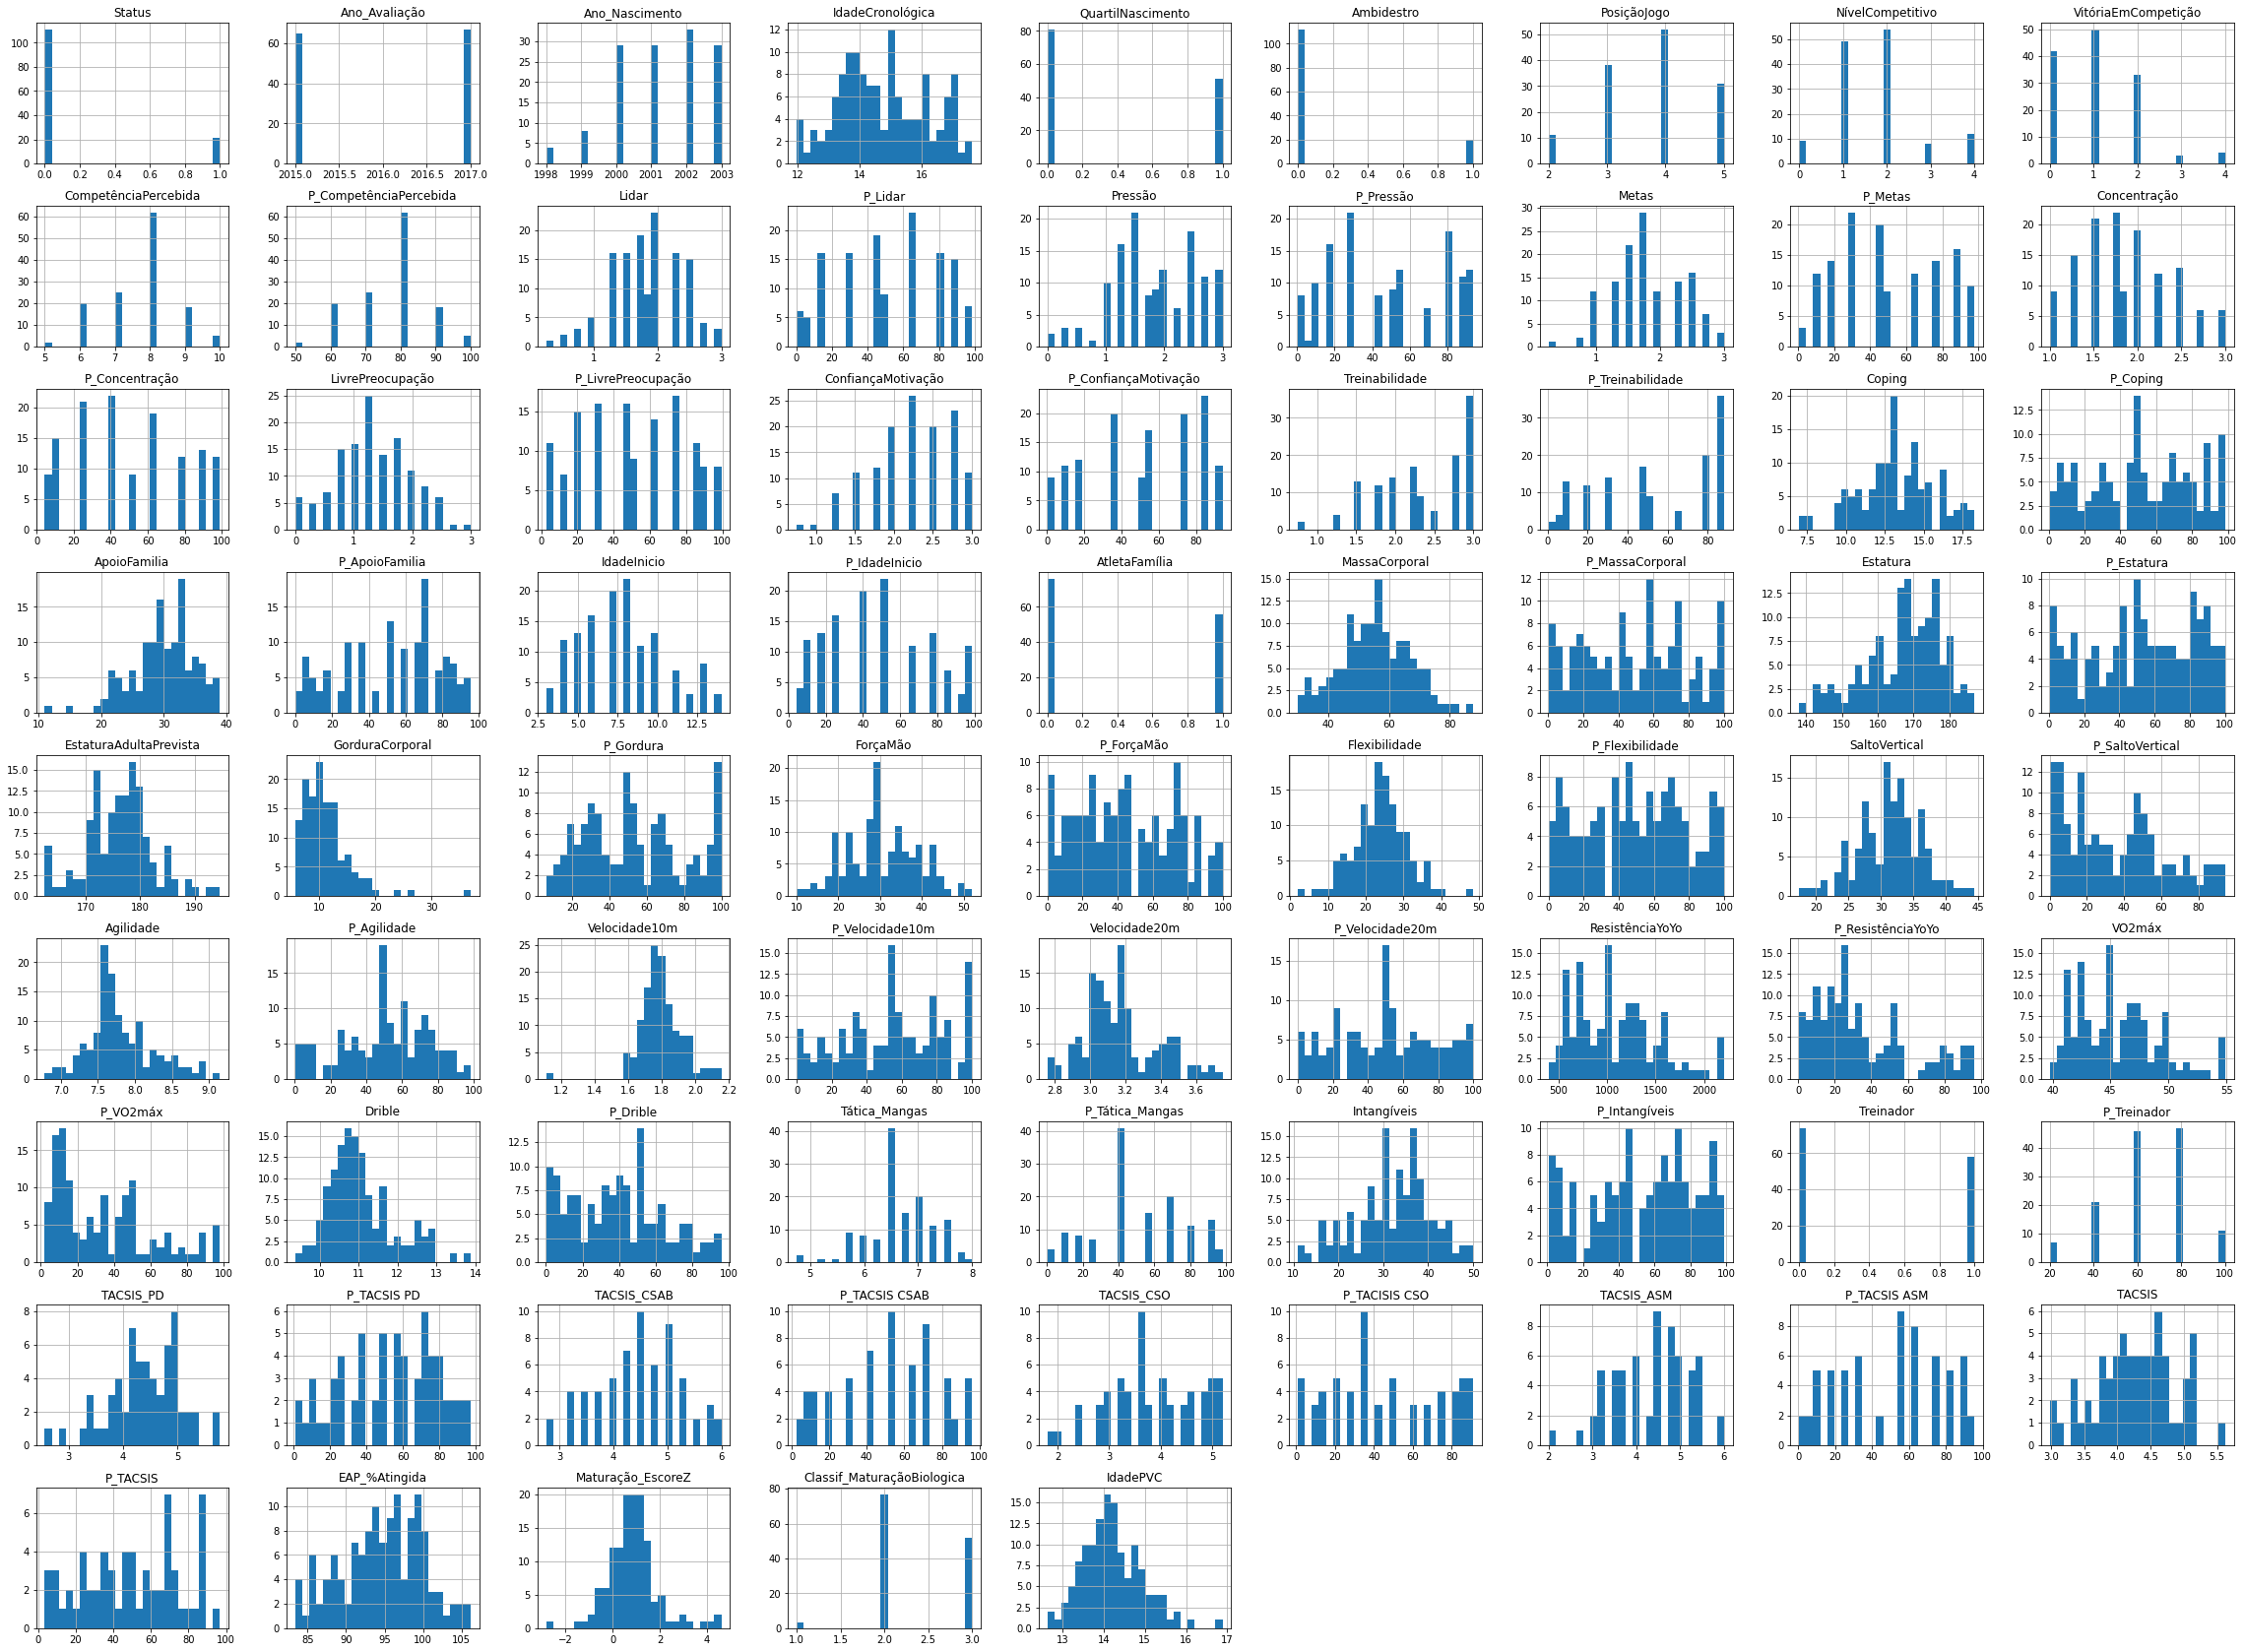

In [70]:
#%matplotlib inline  #tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(40,30)) #hist function in the whole dataset: show a histogram for each numerical attribute
plt.show() #calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed

In [71]:
""" pick some instances randomly, and set them aside: """
""" Solution for the data snooping bias """
def split_train_test(data, test_ratio): #set aside part of the dataS - splitting data arrays into two subsets: for training data and for testing data
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[train_indices]


In [72]:
train_set, test_set = split_train_test(df, 0.2) #20% of the dataset (or less if your dataset is very large)
len(train_set)

106

In [73]:
len(test_set)

106

In [74]:
################################################################################################
""" confuso ainda, pag 55 """

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data,  test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [75]:
df_with_id = df.reset_index() #adds an `index` column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [76]:
test_set.head()

,index,Codigo,Status,Ano_Avaliação,Ano_Nascimento,IdadeCronológica,QuartilNascimento,Ambidestro,PosiçãoJogo,NívelCompetitivo,...,TACSIS_CSO,P_TACISIS CSO,TACSIS_ASM,P_TACSIS ASM,TACSIS,P_TACSIS,EAP_%Atingida,Maturação_EscoreZ,Classif_MaturaçãoBiologica,IdadePVC
2,2,Artta _36758,0,2015,2000,15.030801,0,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,100.646853,1.616806,3,12.867770
5,5,Dieuza_36753,0,2015,2000,15.044490,0,0,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,94.297742,-0.080818,2,14.608619
12,12,Gabira_36713,1,2015,2000,15.154004,0,0,3,2,...,5.2,90.987733,5.00,73.891370,4.841667,77.935005,97.039085,0.652162,2,14.018454
16,16,Guisus_37642,0,2015,2003,12.610541,1,1,4,2,...,4.2,59.483487,5.25,81.858875,5.130000,87.899952,88.756887,1.336099,3,14.299794
23,23,Jorgal_36536,0,2015,2000,15.696099,1,0,3,4,...,4.0,50.797831,4.25,44.038231,4.030000,35.942357,96.361072,0.109085,2,14.044195


In [77]:
df_with_id["ID"] = df["IdadeCronológica"] * 10 + df["Ano_Nascimento"] #combine IdadeCronológica and Ano_Nascimento into an ID
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "ID")

#here, is needed to find a unique variable to set as an ID
#created a index column to be used as an ID
######check if it is correct

In [78]:
test_set.head()

,index,Codigo,Status,Ano_Avaliação,Ano_Nascimento,IdadeCronológica,QuartilNascimento,Ambidestro,PosiçãoJogo,NívelCompetitivo,...,P_TACISIS CSO,TACSIS_ASM,P_TACSIS ASM,TACSIS,P_TACSIS,EAP_%Atingida,Maturação_EscoreZ,Classif_MaturaçãoBiologica,IdadePVC,ID
0,0,Arnmil_36450,0,2015,1999,15.874059,0,0,5,2,...,NaN,NaN,NaN,NaN,NaN,98.676785,0.808696,2,14.320515,2157.740589
21,21,Joarto_36840,0,2015,2000,14.806297,0,0,5,0,...,4.092951,3.00,7.214504,2.981944,3.437950,95.543942,0.764660,2,14.507392,2148.062971
24,24,Josis _37376,0,2015,2002,13.338809,0,1,3,2,...,NaN,NaN,NaN,NaN,NaN,88.065706,0.246923,2,13.960280,2135.388090
26,26,Leoira_37659,0,2015,2003,12.563997,1,0,4,2,...,75.174777,4.75,64.802729,4.660000,69.497427,85.700310,0.108558,2,14.239404,2128.639973
37,37,Marno _36608,0,2015,2000,15.441478,1,0,4,1,...,NaN,NaN,NaN,NaN,NaN,97.639050,0.812580,2,14.152798,2154.414784


In [79]:
from sklearn.model_selection import train_test_split

#split datasets into multiple subsets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) #random_state=> set the random generator seed

In [80]:
test_set.head()

,Codigo,Status,Ano_Avaliação,Ano_Nascimento,IdadeCronológica,QuartilNascimento,Ambidestro,PosiçãoJogo,NívelCompetitivo,VitóriaEmCompetição,...,TACSIS_CSO,P_TACISIS CSO,TACSIS_ASM,P_TACSIS ASM,TACSIS,P_TACSIS,EAP_%Atingida,Maturação_EscoreZ,Classif_MaturaçãoBiologica,IdadePVC
56,Tialix_37016,1,2015,2001,14.324435,0,0,3,2,2,...,4.8,81.593987,4.50,54.775843,4.710000,71.904269,94.026470,0.764260,2,14.055765
83,Henado_37151,0,2017,2001,15.408624,0,0,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,98.214808,0.966526,2,13.972992
19,Jeaior_37266,0,2015,2002,13.639973,1,0,3,1,1,...,3.2,19.489452,3.75,25.142890,3.750000,22.662735,91.975931,0.771969,2,14.612362
31,Lucnso_37027,1,2015,2001,14.294319,0,1,5,4,2,...,5.0,86.864312,5.25,81.858875,5.006944,84.134475,94.874545,0.978420,2,14.510036
76,GabeSa_37260,1,2017,2002,15.112936,1,0,4,2,2,...,3.8,42.074029,4.00,34.090297,4.040278,36.316935,98.519739,1.048059,3,13.599476


In [81]:
# using pd.cut() to create an "idade" category attribute with 6
#IdadeCronológica pode ser subdividida em categorias: 12,13,14,15,16,17
################################################## n entendi

df["idade"] = pd.cut(df["IdadeCronológica"], 
                     bins = [12.0,13.0,14.0,15.0,16.0,17.0, np.inf], 
                     labels = [12, 13, 14, 15, 16, 17])

In [82]:
df["idade"].value_counts()

13    35
15    28
14    27
16    23
12    11
17     7
Name: idade, dtype: int64

<AxesSubplot:>

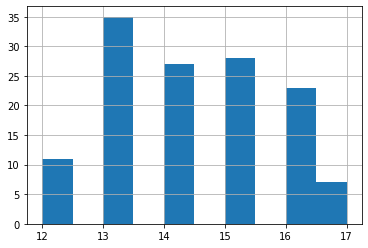

In [83]:
df["idade"].hist() #represent the "idade" category

In [95]:
#to do stratified sampling based on the "idade" category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["idade"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
strat_test_set["idade"].value_counts() / len(strat_test_set)